In [195]:
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

In [1]:
dir = 'C:/Users/vindla/Downloads/Cg_DS4/AV_Mc'
import os
os.chdir(dir)

# McKinsey Analytics Online Hackathon - Healthcare Analytics - Held by Analyticsvidhya on April 13,2018

## Introduction

McKinsey Analytics conducted Online Hiring Hackathon on Analyticsvidhya on April 13-14, 2018. Prize for the winners is 'An all-expenses paid trip to an international analytics conference'

Problem statement is related to Health Analytics Domain. More details can be found [here](https://datahack.analyticsvidhya.com/contest/mckinsey-analytics-online-hackathon/)

This Approach is divided into x sections. It starts with Problem statement, importing data, descriptive analytics and visualization, feature engineering, splitting data into training and validating, model building and finaling predicting the test set.





## Problem Statement
Client has a chain of hospitals aiming to create the next generation of healthcare for its patients, has retained McKinsey to help achieve its vision. The company brings the best doctors and enables them to provide proactive health care for its patients. One such investment is a Center of Data Science Excellence.

In this case, client wants to have study around one of the critical disease "Stroke". Stroke is a disease that affects the arteries leading to and within the brain. A stroke occurs when a blood vessel that carries oxygen and nutrients to the brain is either blocked by a clot or bursts (or ruptures). When that happens, part of the brain cannot get the blood (and oxygen) it needs, so it and brain cells die.
 
Over the last few years, the Client has captured several health, demographic and lifestyle details about its patients. This includes details such as age and gender, along with several health parameters (e.g. hypertension, body mass index) and lifestyle related variables (e.g. smoking status, occupation type).

The Client wants you to predict the probability of stroke happening to their patients. This will help doctors take proactive health measures for these patients.

## About the Dataset

In [63]:
#load the data
import pandas as pd #Load the data
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")
train_data['source'] = 'train'
test_data['source'] = 'test'
full_data  = pd.concat([train_data, test_data])

In [29]:
print('Training data has %d records and Test data has %d records' %(len(train_data),len(test_data)))
print('\nVariables in the data are: ', list(train_data.columns))

Training data has 43400 records and Test data has 18601 records

Variables in the data are:  ['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status', 'stroke']


In [64]:
# lets look at the top few rows
train_data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,source
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0,train
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0,train
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0,train
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0,train
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0,train


In [34]:
# lets look at data types
train_data.dtypes 

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

## Univariate Analysis

### Variable ID

* 'id' variable uniquely identifies each record and is not very useful field for model.

### Variable Gender

* 'gender' datatype is object

In [66]:
pd.crosstab(full_data.source, full_data.gender)

gender,Female,Male,Other
source,,,
test,10957,7642,2
train,25665,17724,11


- 'gender' variable = 'other' needs to be #imputed. Lets come back to it later

### Variable Age

In [51]:
full_data['age'].describe()

count    62001.000000
mean        42.169475
std         22.522100
min          0.080000
25%         24.000000
50%         44.000000
75%         60.000000
max         82.000000
Name: age, dtype: float64

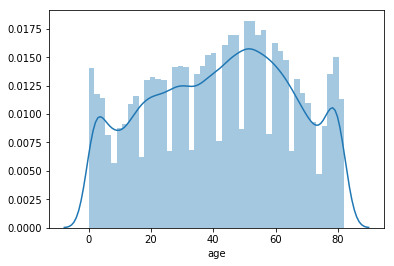

In [49]:
import seaborn as sns
%matplotlib inline
sns.distplot(full_data['age'])

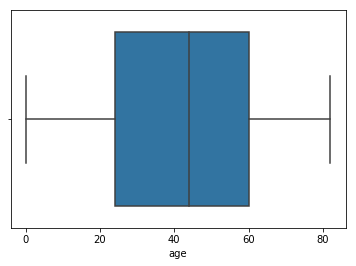

In [82]:
sns.boxplot(full_data.age)

* Age deviates from normal distribution
* Have skewness
* No Outliers

In [50]:
#skewness and kurtosis
print("Skewness: %f" % full_data['age'].skew())
print("Kurtosis: %f" % full_data['age'].kurt())

Skewness: -0.099093
Kurtosis: -1.003695


### Variable Hypertension


In [67]:
pd.crosstab(full_data.source, full_data.hypertension)

hypertension,0,1
source,,
test,16868,1733
train,39339,4061


### Variable heart_disease

In [68]:
pd.crosstab(full_data.source, full_data.heart_disease)

heart_disease,0,1
source,,
test,17707,894
train,41338,2062


### Variable Marital Status

In [72]:
pd.crosstab(full_data.source, full_data.ever_married)

ever_married,No,Yes
source,,
test,6662,11939
train,15462,27938


### Variable Work Type

In [73]:
pd.crosstab(full_data.source, full_data.work_type)

work_type,Govt_job,Never_worked,Private,Self-employed,children
source,,,,,
test,2302,75,10750,2861,2613
train,5440,177,24834,6793,6156


### Variable Residence Type

In [76]:
pd.crosstab(full_data.source, full_data.Residence_type)

Residence_type,Rural,Urban
source,,
test,9291,9310
train,21644,21756


### avg_glucose_level

In [78]:
full_data.avg_glucose_level.describe()

count    62001.000000
mean       104.453832
std         42.960537
min         55.000000
25%         77.540000
50%         91.660000
75%        112.120000
max        291.050000
Name: avg_glucose_level, dtype: float64

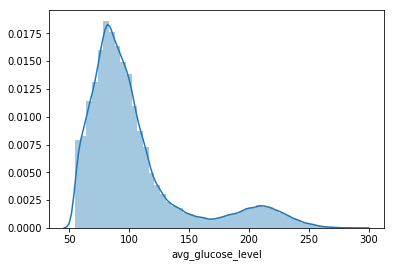

In [79]:
sns.distplot(full_data.avg_glucose_level)

### bmi        

In [100]:
full_data.columns[full_data.isnull().any()] 

Index(['bmi', 'smoking_status', 'stroke'], dtype='object')

In [80]:
full_data.bmi.describe()

count    59948.000000
mean        28.587099
std          7.766122
min         10.100000
25%         23.200000
50%         27.700000
75%         32.800000
max         97.600000
Name: bmi, dtype: float64

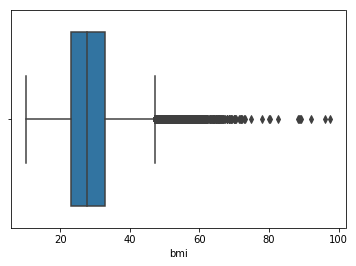

In [111]:
sns.boxplot(full_data.bmi)

* Outlier needs treatment, as bmi >50 seems invalid data

### Smoking Status

In [90]:
pd.crosstab(full_data.source,full_data.smoking_status)

smoking_status,formerly smoked,never smoked,smokes
source,,,
test,3260,6833,2757
train,7493,16053,6562


### Variable Stroke

In [104]:
pd.crosstab(full_data.source,full_data.stroke)

stroke,0.0,1.0
source,,
train,42617,783


* It is a highly imbalanced dataset. Classes have to be balanced #model

## Missing values 

In [110]:
full_data.columns[full_data.isnull().any()]

Index(['bmi', 'smoking_status', 'stroke'], dtype='object')

* bmi and smoking_status has missing values, and they need imputaion

In [119]:
# Impute smoking status=NaN with 'other'
full_data.loc[pd.isnull(full_data['smoking_status']),'smoking_status'] = "other"

# Impute bmi=NaN with mean
full_data.loc[pd.isnull(full_data['bmi']),'bmi'] = full_data.bmi.mean()

## Feature Engineering

* Created a combined feature with gender and age

In [116]:
# Create new variable 'Person' instead of gender
# consider <16 age as child for gender
def assign_child(psngr):
    age, gender = psngr
    return 'child' if age <= 16 else gender

full_data['Person'] = full_data[['age','gender']].apply(assign_child,axis=1)

* Created Bins for avg_glucose_level and bmi

In [117]:
# Binning the numeric variables: avg_glucose_level
bins = [0, 170, 195, 225, 500]
labels = [1,2,3,4]
full_data['avg_glucose_level_bin'] = pd.cut(full_data['avg_glucose_level'],bins=bins, labels=labels)


# Binning the numeric variables:bmi (ref: https://www.helpguide.org/harvard/understanding-diabetes.html)
bins = [0,19,24,29,34,39,100]
labels = [1,2,3,4,5,6]
full_data['bmi_bin'] = pd.cut(full_data['bmi'],bins=bins, labels=labels)

## Multivariate Analysis

In [123]:
tab = pd.crosstab(full_data['Person'],full_data['stroke'])
#tab.plot(kind='bar',stacked=True)
tab

stroke,0.0,1.0
Person,,
Female,21768,429
Male,13776,352
Other,9,0
child,7064,2


* Lets visualize Person vs smoking status

In [124]:
pd.crosstab(full_data['Person'],full_data['smoking_status'])

smoking_status,formerly smoked,never smoked,other,smokes
Person,,,,
Female,5792,14331,6365,5163
Male,4744,7246,4160,4092
Other,4,2,2,1
child,213,1307,8516,63


In [125]:
# made all children 'never smoked' as we have only 2 stroke cases.
full_data.loc[(full_data.Person=='child'),'smoking_status'] = 'never smoked'

In [126]:
#made all children 'Stroke = 0'
full_data.loc[(full_data.Person=='child'),'stroke'] = 0


* Lets visualize 'Person' and 'work Type'

In [128]:
pd.crosstab(full_data['Person'],full_data['work_type'])

work_type,Govt_job,Never_worked,Private,Self-employed,children
Person,,,,,
Female,4656,76,21236,5683,0
Male,3020,51,13303,3868,0
Other,2,0,7,0,0
child,64,125,1038,103,8769


In [129]:
# made all children 'work_type = children'
full_data.loc[(full_data.Person=='child'),'work_type'] = 'children'


##  Model Building

### Standardize variables

In [131]:
from sklearn import preprocessing

# Standardize the numeric variables. i.e Age
full_data.age = preprocessing.scale(full_data.age)

# Label Encoding the text variables
le = preprocessing.LabelEncoder()
full_data.Residence_type = le.fit_transform(full_data.Residence_type) 
full_data.ever_married = le.fit_transform(full_data.ever_married) 
full_data.Person = le.fit_transform(full_data.Person) 
full_data.smoking_status = le.fit_transform(full_data.smoking_status) 
full_data.work_type = le.fit_transform(full_data.work_type) 

# Making the variables categorical, except Age
full_data.Residence_type = full_data.Residence_type.astype('category') 
full_data.ever_married = full_data.ever_married.astype('category')
full_data.Person = full_data.Person.astype('category')
full_data.smoking_status = full_data.smoking_status.astype('category')
full_data.work_type = full_data.work_type.astype('category')

full_data.heart_disease = full_data.heart_disease.astype('category')
full_data.hypertension = full_data.hypertension.astype('category')

full_data =  pd.get_dummies(full_data,columns = ['bmi_bin','avg_glucose_level_bin','heart_disease','hypertension']) 


### Split the combined data into train and test 

In [285]:
#=================================================================================#
# Split the combined data into train and test
#train = full_data[0:len(train_data)]
train = full_data[full_data.source == 'train']
train_y = train['stroke'].astype('category')

train_x = train.drop(['id', 'gender','stroke','bmi','avg_glucose_level','source'], axis=1)

#test = full_data[len(train_data):]
test = full_data[full_data.source == 'test']
test_x = test.drop(['id', 'gender','stroke','bmi','avg_glucose_level','source'], axis=1)

### Model

In [286]:
'''import sys
sys.path.append('c:\\installations\\anaconda\\lib\\site-packages')
print(sys.path)
'''

"import sys\nsys.path.append('c:\\installations\\anaconda\\lib\\site-packages')\nprint(sys.path)\n"

In [293]:
import numpy as np
import keras
from keras.optimizers import Adam, SGD
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten
from keras.regularizers import l2
import matplotlib.pyplot as plt
%matplotlib inline

In [294]:
# Model of Keras + Tensorflow 
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

# Dataset is highly imbalanced, used class weight
from sklearn.utils import class_weight
class_weight = class_weight.compute_class_weight('balanced', np.unique(train_y), train_y)
class_weight = dict(enumerate(class_weight))

# Set hyperparameters
batch_size = 100
epochs = 100

# timebased learning decay
learning_rate = 0.1
decay_rate = learning_rate / epochs
optimizer = Adam(lr=learning_rate, decay=decay_rate)


Train on 29077 samples, validate on 14323 samples
Epoch 1/100
29077/29077 [==============================] - 1s 31us/step - loss: 0.6874 - acc: 0.5405 - val_loss: 0.7092 - val_acc: 0.9812
Epoch 2/100
29077/29077 [==============================] - 1s 19us/step - loss: 0.6861 - acc: 0.9824 - val_loss: 0.7085 - val_acc: 0.9812
Epoch 3/100
29077/29077 [==============================] - 1s 20us/step - loss: 0.6861 - acc: 0.9824 - val_loss: 0.7082 - val_acc: 0.9812
Epoch 4/100
29077/29077 [==============================] - 1s 23us/step - loss: 0.6861 - acc: 0.8006 - val_loss: 0.7079 - val_acc: 0.0188
Epoch 5/100
29077/29077 [==============================] - 1s 23us/step - loss: 0.6861 - acc: 0.9590 - val_loss: 0.7081 - val_acc: 0.9812
Epoch 6/100
29077/29077 [==============================] - 1s 23us/step - loss: 0.6860 - acc: 0.9723 - val_loss: 0.7080 - val_acc: 0.0188
Epoch 7/100
29077/29077 [==============================] - 1s 22us/step - loss: 0.6861 - acc: 0.9184 - val_loss: 0.7081 - 

29077/29077 [==============================] - 1s 20us/step - loss: 0.6859 - acc: 0.9824 - val_loss: 0.7084 - val_acc: 0.9812
Epoch 60/100
29077/29077 [==============================] - 1s 19us/step - loss: 0.6859 - acc: 0.9824 - val_loss: 0.7084 - val_acc: 0.9812
Epoch 61/100
29077/29077 [==============================] - 1s 19us/step - loss: 0.6859 - acc: 0.6307 - val_loss: 0.7086 - val_acc: 0.9812
Epoch 62/100
29077/29077 [==============================] - 1s 19us/step - loss: 0.6859 - acc: 0.9824 - val_loss: 0.7084 - val_acc: 0.9812
Epoch 63/100
29077/29077 [==============================] - 1s 18us/step - loss: 0.6859 - acc: 0.9824 - val_loss: 0.7083 - val_acc: 0.9812
Epoch 64/100
29077/29077 [==============================] - 1s 20us/step - loss: 0.6859 - acc: 0.9422 - val_loss: 0.7084 - val_acc: 0.9812
Epoch 65/100
29077/29077 [==============================] - 1s 20us/step - loss: 0.6860 - acc: 0.8822 - val_loss: 0.7085 - val_acc: 0.9812
Epoch 66/100
29077/29077 [==============

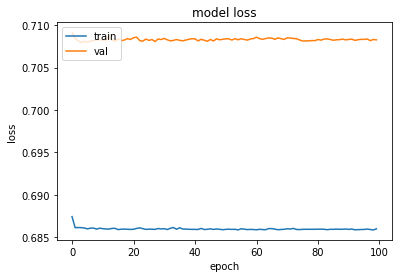

In [296]:

# create model             
model = Sequential()
model.add(Dense(64, input_dim=len(train_x.columns), activation='relu',kernel_regularizer=l2(0.01),
                kernel_initializer = 'random_uniform'))

model.add(Dense(64, activation='relu',kernel_regularizer=l2(0.01),
                kernel_initializer = 'random_uniform'))

model.add(Dense(1, activation='sigmoid',kernel_regularizer=l2(0.01),
                kernel_initializer = 'random_uniform'))


# Compile model
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Fit the model with train:validation (67:33)
hist = model.fit(train_x, train_y, validation_split=0.33, epochs=epochs, batch_size=batch_size, 
                 class_weight = class_weight)

# summarize history for loss
plt.plot(hist.history["loss"])
plt.plot(hist.history["val_loss"])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train", "val"], loc="upper left")
plt.show()

print(hist)

In [298]:
# predict on train_x to see the results and accuracy
# Metrics
from sklearn import metrics
def my_metrics(y_true,y_pred):
    print("Accuracy is %.4f" %metrics.accuracy_score(y_true,y_pred))
    print("========================")
    print("\n Confusion Matrix\n", metrics.confusion_matrix(y_true,y_pred) )
    print("========================")
    print("\n Misclassficiation Report\n", metrics.classification_report(y_true,y_pred))
    print("========================")

    
y_pred = model.predict_classes(train_x) 
my_metrics(train_y,y_pred)

Accuracy is 0.9820

 Confusion Matrix
 [[42619     0]
 [  781     0]]

 Misclassficiation Report
              precision    recall  f1-score   support

        0.0       0.98      1.00      0.99     42619
        1.0       0.00      0.00      0.00       781

avg / total       0.96      0.98      0.97     43400



C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### Train the Model on all training data

In [199]:
# Training the entire dataset: Fit the model
hist = model.fit(train_x, train_y, epochs=epochs, batch_size=batch_size,
                 class_weight = class_weight)


# summarize history for loss
plt.plot(hist.history["loss"])
#plt.plot(hist.history["val_loss"])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train", "val"], loc="upper left")
plt.show()

print(hist)

Epoch 1/100
43400/43400 [==============================] - 1s 16us/step - loss: 0.5055 - acc: 0.7389
Epoch 2/100
43400/43400 [==============================] - 1s 16us/step - loss: 0.5058 - acc: 0.7407
Epoch 3/100
43400/43400 [==============================] - 1s 16us/step - loss: 0.5049 - acc: 0.7354
Epoch 4/100
43400/43400 [==============================] - 1s 16us/step - loss: 0.5055 - acc: 0.7416
Epoch 5/100
43400/43400 [==============================] - 1s 15us/step - loss: 0.5054 - acc: 0.7390
Epoch 6/100
43400/43400 [==============================] - 1s 15us/step - loss: 0.5052 - acc: 0.7440
Epoch 7/100
43400/43400 [==============================] - 1s 15us/step - loss: 0.5052 - acc: 0.7325
Epoch 8/100
43400/43400 [==============================] - 1s 16us/step - loss: 0.5054 - acc: 0.7391
Epoch 9/100
43400/43400 [==============================] - 1s 16us/step - loss: 0.5053 - acc: 0.7382
Epoch 10/100
43400/43400 [==============================] - 1s 16us/step - loss: 0.5054 - a

43400/43400 [==============================] - 1s 15us/step - loss: 0.5050 - acc: 0.7382
Epoch 82/100
43400/43400 [==============================] - 1s 15us/step - loss: 0.5050 - acc: 0.7431
Epoch 83/100
43400/43400 [==============================] - 1s 15us/step - loss: 0.5052 - acc: 0.7360
Epoch 84/100
43400/43400 [==============================] - 1s 15us/step - loss: 0.5051 - acc: 0.7402
Epoch 85/100
43400/43400 [==============================] - 1s 15us/step - loss: 0.5052 - acc: 0.7435
Epoch 86/100
43400/43400 [==============================] - 1s 14us/step - loss: 0.5055 - acc: 0.7364
Epoch 87/100
43400/43400 [==============================] - 1s 16us/step - loss: 0.5054 - acc: 0.7380
Epoch 88/100
43400/43400 [==============================] - 1s 15us/step - loss: 0.5052 - acc: 0.7410
Epoch 89/100
43400/43400 [==============================] - 1s 15us/step - loss: 0.5051 - acc: 0.7346
Epoch 90/100
43400/43400 [==============================] - 1s 15us/step - loss: 0.5053 - acc: 

NameError: name 'plt' is not defined

In [280]:
# complete train data
y_classes = model.predict_classes(train_x)
my_metrics(train_y,y_classes)

Accuracy is 0.7479

 Confusion Matrix
 [[31831 10788]
 [  153   628]]

 Misclassficiation Report
              precision    recall  f1-score   support

        0.0       1.00      0.75      0.85     42619
        1.0       0.06      0.80      0.10       781

avg / total       0.98      0.75      0.84     43400



In [283]:
train_x[train_y==0].head(5)

,Residence_type,age,ever_married,smoking_status,work_type,Person,bmi_bin_1,bmi_bin_2,bmi_bin_3,bmi_bin_4,bmi_bin_5,bmi_bin_6,avg_glucose_level_bin_1,avg_glucose_level_bin_2,avg_glucose_level_bin_3,avg_glucose_level_bin_4,heart_disease_0,heart_disease_1,hypertension_0,hypertension_1
0,0,-1.739171,0,1,4,3,1,0,0,0,0,0,1,0,0,0,1,0,1,0
1,1,0.702894,1,1,2,1,0,0,0,0,0,1,1,0,0,0,1,0,0,1
2,1,-1.517165,0,1,4,3,1,0,0,0,0,0,1,0,0,0,1,0,1,0
3,0,1.235708,1,0,2,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0
4,0,-1.250758,0,1,4,3,0,1,0,0,0,0,1,0,0,0,1,0,1,0


### Predict on Test Data

In [194]:
# predict on test_x
Y_pred = model.predict_proba(test_x)

#Submit
submission = pd.DataFrame({
    "id": test_data["id"],
    "stroke": Y_pred.flatten()
})

submission.to_csv('AV_Mckinsey-Winning Solution.csv', index=False)
